In [1]:
import torch
import torchaudio
from torchaudio.transforms import GriffinLim
from src.data_loader import *
from torch.utils.data import DataLoader
from utils.plot_spectrograms import *

def griffin_lim(magnitude_spectrogram, n_fft, hop_length, num_iters):
    # Initialize the reconstructed phase with random values
    phase = torch.rand(magnitude_spectrogram.size())
    
    # Make the spectrogram complex again
    complex_spectrogram = magnitude_spectrogram * torch.exp(1j * phase)
    
    # Apply Griffin-Lim algorithm
    griffin_lim = GriffinLim(n_fft=n_fft, hop_length=hop_length, n_iter=num_iters, momentum=0.99)
    waveform = griffin_lim(complex_spectrogram)
    
    return waveform


dataset = 0

if dataset:

    path = '../data/AudioMNIST_Indicies/dummy_labels.csv'
    root_dir = '../data/AudioMNIST/'

else:
    path = '../data/AvianID_AcousticIndices/UK_AI.csv'
    root_dir='../data/UK_BIRD/'

# 

ds = AvianNatureSounds(annotation_file_path=path,
                       root_dir=root_dir,
                       key='habitat',
                       mode='stft',
                       length=5,
                       sampling_rate=44100,
                       n_fft=1024,
                       hop_length=512,
                       mel_spectrogram=None,
                       verbose=False,
                       fixed_limit=True)



train_loader = DataLoader(dataset=ds, batch_size=4, shuffle=True)



batch = next(iter(train_loader))

magnitude_spectrogram = batch[1]


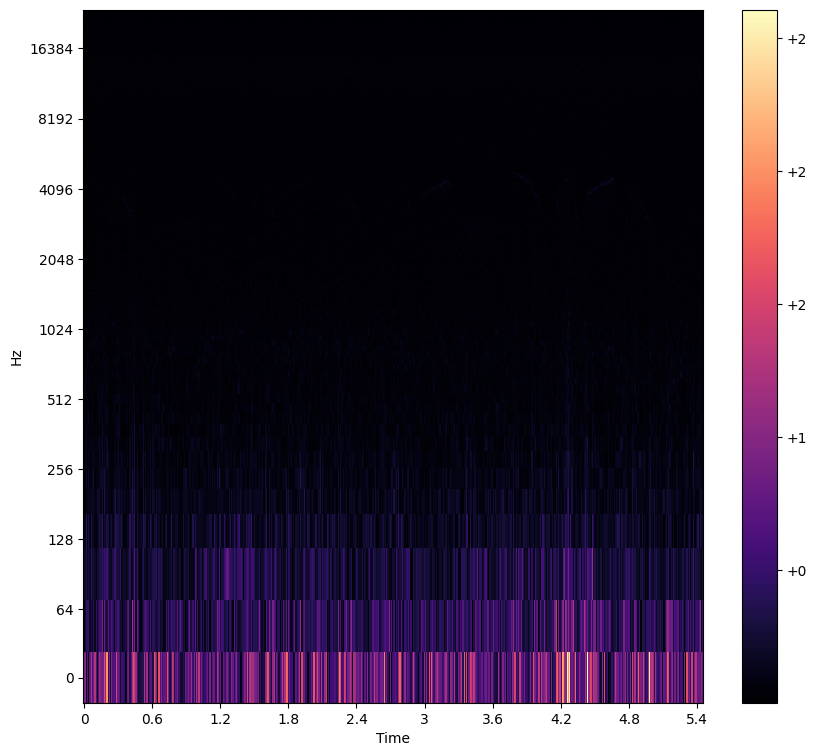

In [2]:
plot_spectrograms(magnitude_spectrogram, magnitude=True)

In [5]:
transform = torchaudio.transforms.GriffinLim(n_fft=1024)

new_row = torch.ones(1, 512)


magnitude_spectrogram_cat = torch.cat((magnitude_spectrogram[0][0], new_row), dim=0)

print(magnitude_spectrogram.shape)

wave = transform(magnitude_spectrogram_cat)



print((wave))

torch.Size([4, 1, 512, 512])
tensor([ 0.0050,  0.0083,  0.0010,  ...,  0.0044, -0.0018, -0.0048])
